In [98]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib widget
import config 

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [50]:
tt1 = pd.read_csv('tt1.csv')
tt2 = pd.read_csv('tt2.csv')

tt1["offset"] = (tt1.t2 + tt1.t3) / 2 - (tt1.t1 + tt1.t4) / 2
tt2["offset"] = (tt2.t2 + tt2.t3) / 2 - (tt2.t1 + tt2.t4) / 2

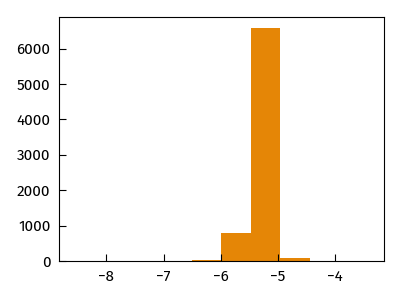

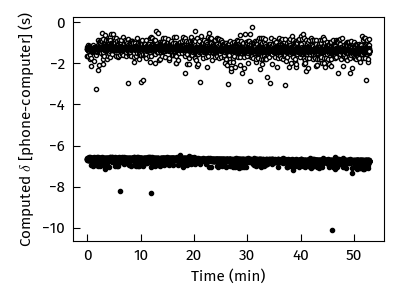

In [51]:
fig, ax = plt.subplots()
ax.hist(tt1.offset - tt2.offset)

fig, ax = plt.subplots()
ax.plot((tt1.t1 - tt1.t1.iloc[0]) / 60, tt1.offset, 'k.', mfc='k')
ax.plot((tt2.t1 - tt2.t1.iloc[0]) / 60, tt2.offset, 'k.', mfc='w')
ax.set_xlabel('Time (min)')
ax.set_ylabel('Computed $\delta$ [phone-computer] (s)')
fig.tight_layout()

Text(0.5, 0, '$t_4 - t_1$ (s)')

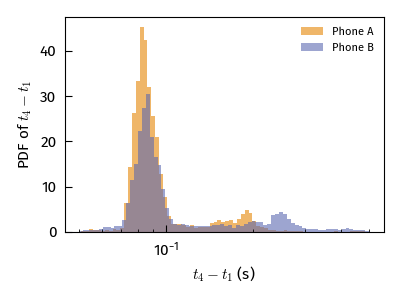

In [138]:
fig, ax = plt.subplots() 
tt1.d = tt1.t4 - tt1.t1
tt2.d = tt2.t4 - tt2.t1
ax.hist(tt1.d, bins=np.geomspace(tt1.d.min(), 0.5, 75), alpha=0.6, density=True, label='Phone A');
ax.hist(tt2.d, bins=np.geomspace(tt2.d.min(), 0.5, 75), alpha=0.6, density=True, label='Phone B');

ax.set_xscale('log')
ax.legend() 
ax.set_ylabel('PDF of $t_4 - t_1$')
ax.set_xlabel('$t_4 - t_1$ (s)')



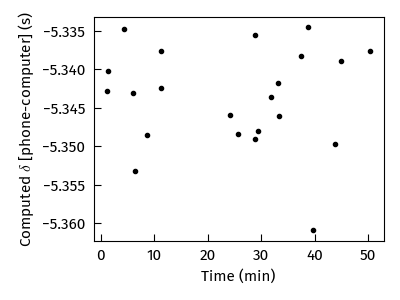

In [143]:
fig, ax = plt.subplots()
eps = 1e-3
id = (abs(tt1.d - tt1.d.median()) < eps) * (abs(tt2.d - tt1.d.median()) < eps)
ax.plot((tt1.t1 - tt1.t1.iloc[0])[id] / 60, (tt1.offset - tt2.offset)[id], 'k.', mfc='k')
ax.set_xlabel('Time (min)')
ax.set_ylabel('Computed $\delta$ [phone-computer] (s)')
fig.tight_layout()

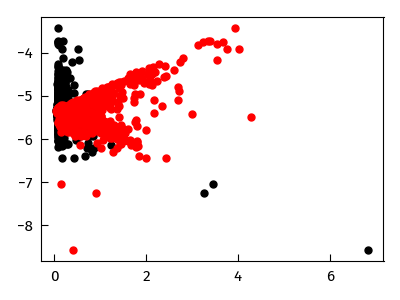

In [86]:
fig, ax = plt.subplots() 

ax.plot(tt1.d, tt1.offset - tt2.offset, '.', ms=10, c='k')
ax.plot(tt2.d, tt1.offset - tt2.offset, '.', ms=10, c='r')

,Unnamed: 0,t1,t2,t3,t4,offset
0,0,-0.184234,-5.533368,-5.533485,-0.796665,-5.042977
1,0,-0.105429,-5.450265,-5.451912,-0.110185,-5.343282
2,0,-0.215066,-5.463858,-5.453266,-0.125223,-5.288417
3,0,-0.116880,-5.659344,-5.659221,-0.302377,-5.449654
4,0,-0.103055,-5.445792,-5.461412,-0.769613,-5.017268
...,...,...,...,...,...,...
7495,0,-0.102353,-5.441855,-5.450812,-0.106466,-5.341924
7496,0,-0.105950,-5.454105,-5.454220,-0.109046,-5.346665
7497,0,-0.111023,-5.458526,-5.462072,-0.115230,-5.347172
7498,0,-0.177119,-6.760095,-6.748688,-1.477348,-5.927158
